# IMPORT LIBRARY

In [4]:
%matplotlib notebook
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
import random
import string
import time
import pandas as pd
import urllib
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from numpy import linalg as LA
import scipy
import warnings
warnings.filterwarnings('ignore')

# Exploring data

## QUESTION 1

In [6]:
#1.1. Importer base de données et l'afficher
fields=["year","gnp","invest","cpi","interest"]
df=pd.read_csv("invest.txt",sep=' ',usecols=fields)
n=len(df["gnp"])
df.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


## QUESTION 2

<IPython.core.display.Javascript object>


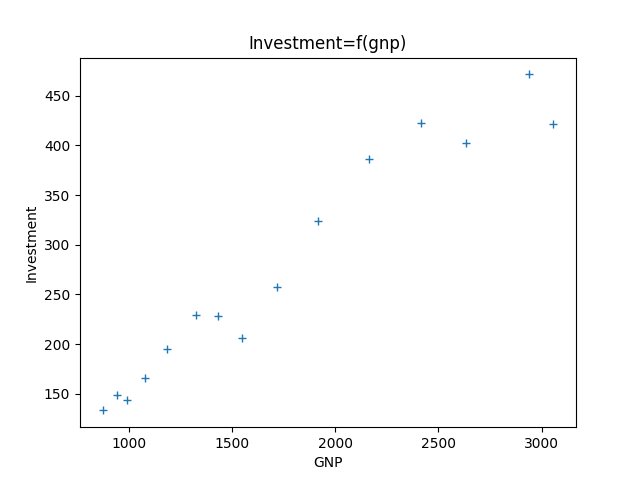

In [7]:
fig1=plt.figure()
plt.plot(df["gnp"],df["invest"],"+")
plt.xlabel("GNP")
plt.ylabel("Investment")
plt.title("Investment=f(gnp)")
plt.show()

Regression : log(invest)=theta0 +theta1*log(gnp)


# 1D Linear regression

## QUESTION 3

### 3.1 Intercept et pente

Pour calculer la pente et l'intercept, on utilise les formules théoriques:
pour l'estimateur $\hat{\theta}_0$ (intercept) et l'estimateur $\hat{\theta}_1$ (la pente)


$$
\hat\theta_0= \overline{y}_n -\hat{\theta}_1 \overline{x}_n,\qquad  \hat\theta_1=  \displaystyle\frac{ \sum_{i=1}^n (x_i-\overline{x}_n)(y_i -\overline{y}_n)}{\sum_{i=1}^n (x_i-\overline{x}_n)^2} .
$$
$\hat{\theta}_1$ sera calculé ci-dessous sous sa forme vectorielle.

In [4]:
#Tranformation variables
gnp_log=(np.log(df["gnp"]))
invest_log=(np.log(df["invest"]))
#Calcul theta1 et theta0 
Y=invest_log.values.reshape(n,1)
x=gnp_log.values.reshape(1,n)
Y_=Y.mean()
x_=x.mean()
theta1=np.dot((x-x_),(Y-Y_))/(np.linalg.norm((x-x_)))**2
theta0=Y_-theta1*x_
print("L'intercept est: " )
print("%.4f" % theta0.squeeze())
print("La pente est : ")
print("%.4f" % theta1.squeeze())

L'intercept est: 
-1.9636
La pente est : 
1.0153


### 3.2 Calcul de la variance du bruit et Matrice de Gram pour calculer les écarts-types de l'intercept et de la pente

$Y$ est le vecteur représentant les données à expliquer.
$X$ est la matrice représentant les données à expliquer.
Dans cette partie, la matrice Gram est calculée, ainsi que la variance du bruit
$\sigma$

In [5]:
#Vecteur theta (Estimateur)
n=len(df["gnp"]) #Data length
theta=(np.array([theta0,theta1])).reshape(2,1)
#Creation Matrice des valeurs explicatives MatX
vecteur1=np.ones((1,n)).reshape(n,1)
Mx=gnp_log.values.reshape(n,1)
MatX=np.concatenate((vecteur1,Mx),axis=1)
#Creation des valeurs expliquées Y et prédites Y_prediction
Y=invest_log.values.reshape(n,1)
Y_prediction= np.dot(MatX,theta)
#Estimation de la variance sigma du bruit
sigma_bruit=np.sqrt((np.linalg.norm(Y-Y_prediction))**2*(1/(n-2)))
#CALCUL DE LA MATRICE DE GRAM 
G=np.dot((np.transpose(MatX)),MatX)
G_inv=np.linalg.inv(G)
G_inv
print("La variance de l'erreur est :")
print("%4f" %sigma_bruit)
print("La matrice de Gram est: ")
print(G.squeeze())

La variance de l'erreur est :
0.087615
La matrice de Gram est: 
[[ 15.         110.75282116]
 [110.75282116 820.24847688]]


### 3.3 CALCUL DES ÉCART-TYPES

 $$std[i ]=\sigma \sqrt(1/G[i,i])$$ 


In [22]:
varb1=sigma_bruit**2*(G_inv[0,0])
std1=np.sqrt(varb1)
varb2=sigma_bruit**2*(G_inv[1,1])
std2=np.sqrt(varb2)
print("L'écart-type de l'intercept est: ")
print("%4f" %std1 )
print("L'écart-type de la pente est :")
print("%4f" %std2)

L'écart-type de l'intercept est: 
0.409547
L'écart-type de la pente est :
0.055383


### 3.4 CALCUL DU VECTEUR PREDICTION ET DU COEFFICIENT DE DETERMINATION

In [23]:
vecteur1=np.ones(n)
invest_log_mean=np.mean(invest_log)
invest_log_mean_v=float(invest_log_mean)*vecteur1
gnp_log_v=gnp_log.values*vecteur1
R_upper=Y_prediction-invest_log_mean_v
R_lower=Y-invest_log_mean_v
R2=R_upper/R_lower
R=(np.linalg.norm(R_upper))**2/((np.linalg.norm(R_lower))**2)
print("Le coefficient de détermination R2 est: " )
print("%.4f" % R)

Le coefficient de détermination R2 est: 
0.9628


## QUESTION 4

In [24]:
#Calcul du test Statistique
#t-test de theta1 (pente de l'estimateur)
t=theta1.squeeze()/std2
p=(1-scipy.stats.t.cdf(t,df=n-2))*2
quantile=scipy.stats.t.ppf(0.95,df=n-2)
print("Le t statistique de la pente est: ")
print("%.4f" %t)
print("Le quantile est : ")
print("%.4f" %quantile)
print("La p value est :") 
print(p)
#On rejette le test <0.05 donc on garde la valeur

Le t statistique de la pente est: 
18.3320
Le quantile est : 
1.7709
La p value est :
1.1363709973011282e-10


## QUESTION 5

In [25]:
X_a_predire=np.array([1,np.log(1000)]).reshape(1,2)
Invest_a_predire=np.dot(X_a_predire,theta)
prediction=np.exp(Invest_a_predire)
print("L'investissement prédit pour GNP = 1000 pour le modèle est : " )
print("%.4f" %(prediction.squeeze()))
print("Le log de l'investissement prédit pour log(GNP) = 1000 pour le modèle est : " )
print("%.4f" %(Invest_a_predire.squeeze()))

L'investissement prédit pour GNP = 1000 pour le modèle est : 
155.9794
Le log de l'investissement prédit pour log(GNP) = 1000 pour le modèle est : 
5.0497


## QUESTION 6 


### 6.1 INTERVALLE DE CONFIANCE ET PREDICTION

In [26]:
#Intervalle de confiance pour la valeur prédite à un niveau de 90 % 
alpha=0.1

Q=scipy.stats.t.ppf(0.95,df=n-2)
#Inverse (TXX)
Gram=np.transpose(MatX).dot(MatX)
Gram_inv=np.linalg.inv(Gram)
X_a_predire_t=X_a_predire.reshape(1,2)
A1=X_a_predire.dot(Gram_inv)
A=A1.dot(X_a_predire.reshape(2,1))
#Prediction interval
ICP1=np.dot(X_a_predire,theta)-Q*sigma_bruit*(np.sqrt(1+A))
ICP2=np.dot(X_a_predire,theta)+Q*sigma_bruit*(np.sqrt(1+A))
#Intervalle de confiance pour la valeur à expliquer
IC1=np.dot(X_a_predire,theta)-Q*sigma_bruit*(np.sqrt(A))
IC2=np.dot(X_a_predire,theta)+Q*sigma_bruit*(np.sqrt(A))

print("L'intervalle de confiance est:")
print("[" + str(round(np.exp(IC1.squeeze()),4)) + " : " +str(round(np.exp(IC2.squeeze()),4))+"]")
print("L'intervalle de prédiction est:")
print("[" +str(round(np.exp(ICP1.squeeze()),4))+ " : " +str(round(np.exp(ICP2.squeeze()),4)) +"]")
print("En LOG")
print("L'intervalle de confiance en log est:")
print("[" + str(round(float(IC1.squeeze()),4))+ " : " +str(round(float(IC2.squeeze()),4))+"]")
print("L'intervalle de prédiction  en log est:")
print("[" + str(round(float(ICP1.squeeze()),4))+ " : " +str(round(float(ICP2.squeeze()),4))+"]")

L'intervalle de confiance est:
[146.6755 : 165.8735]
L'intervalle de prédiction est:
[132.0024 : 184.3117]
En LOG
L'intervalle de confiance en log est:
[4.9882 : 5.1112]
L'intervalle de prédiction  en log est:
[4.8828 : 5.2166]


### 6.2 Graphiques

<IPython.core.display.Javascript object>


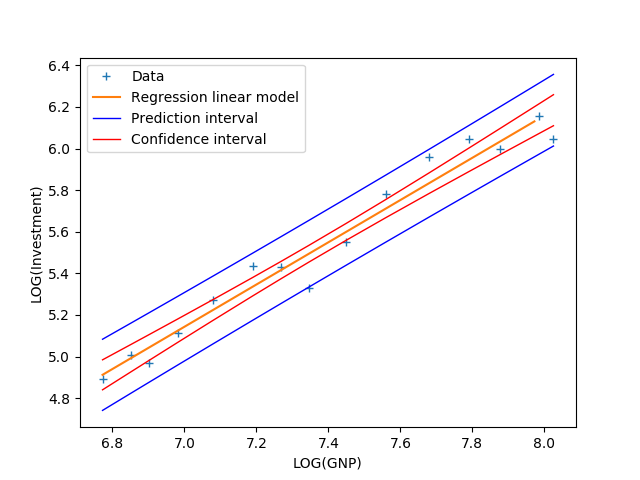

In [27]:
#Graphiques
sigma_bruit=np.sqrt((np.linalg.norm(Y-Y_prediction))**2*(1/(n-2)))
gnp_log=(np.log(df["gnp"]))
invest_log=(np.log(df["invest"]))
A1=X_a_predire.dot(Gram_inv)
A=A1.dot(X_a_predire.reshape(2,1))
A1=MatX.dot(Gram_inv)
A=A1.dot(np.transpose(MatX))#//np.diag(MatX))

plt.clf()
x = np.arange(np.min(gnp_log.values),np.max(gnp_log.values),0.1)
def f(x):
    return theta0.squeeze()+theta1.squeeze()*x

y=f(x)
fig2=plt.figure()
plt.plot(gnp_log,invest_log,'+',linewidth=1,label='Data')
plt.plot(x,y,label='Regression linear model')

IC1=np.dot(MatX,theta)-Q*sigma_bruit*np.diag((np.sqrt(A))).reshape(n,1)
IC2=np.dot(MatX,theta)+Q*sigma_bruit*np.diag((np.sqrt(A))).reshape(n,1)
IPP1=np.dot(MatX,theta)-Q*sigma_bruit*np.diag((np.sqrt(1+A))).reshape(n,1)
IPP2=np.dot(MatX,theta)+Q*sigma_bruit*np.diag((np.sqrt(1+A))).reshape(n,1)
plt.plot(gnp_log.values,IPP1,"b",linewidth=1)
plt.plot(gnp_log.values,IPP2,"b",linewidth=1,label='Prediction interval')
plt.plot(gnp_log.values,IC1,"r",linewidth=1,label='Confidence interval')
plt.plot(gnp_log.values,IC2,"r",linewidth=1)
plt.legend()
plt.xlabel("LOG(GNP)")
plt.ylabel("LOG(Investment)")
plt.show()

## QUESTION 7

In [28]:
skl_linmod = linear_model.LinearRegression()
gnp_log=(np.log(df[["gnp"]]))
invest_log=(np.log(df["invest"]))
skl_linmod.fit(gnp_log,invest_log)
theta0 = skl_linmod.intercept_
theta1 = skl_linmod.coef_[0]
y_pred=skl_linmod.predict(gnp_log)
theta0 = skl_linmod.intercept_
theta1 = skl_linmod.coef_[0]
R_=r2_score(Y, y_pred)  
print("L'intercept est : "+str(round(theta0,4))+ " la pente est : " +str(round(theta1,4)))
print("Le coefficient de détermination est : "+str(round(R,4)))
y_pred_gnp_1000=skl_linmod.predict(np.log(1000))
print("Prediction pour GNP=1000 : " +str(round(np.exp(y_pred_gnp_1000.squeeze()),4)))

L'intercept est : -1.9636 la pente est : 1.0153
Le coefficient de détermination est : 0.9628
Prediction pour GNP=1000 : 155.9794


## QUESTION 8

<IPython.core.display.Javascript object>


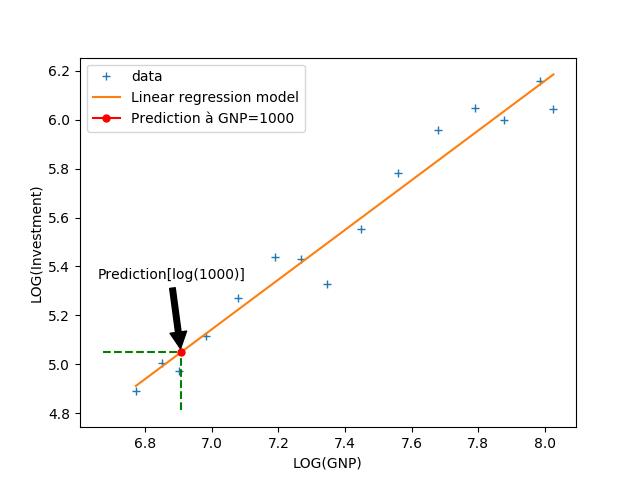

In [29]:
fig3=plt.figure(3)
plt.plot(gnp_log,invest_log,'+',linewidth=1, label='data')
plt.plot(gnp_log,y_pred,label="Linear regression model")
plt.plot([np.min(gnp_log)-0.1,np.log(1000)], [y_pred_gnp_1000,y_pred_gnp_1000], color='g', linewidth=1.5,
         linestyle="--")
plt.plot([np.log(1000),np.log(1000)], [np.min(y_pred)-0.1,y_pred_gnp_1000], color='g', linewidth=1.5,
         linestyle="--")
plt.plot([np.log(1000)], [y_pred_gnp_1000], marker='o', markersize=5, color="red",label='Prediction à GNP=1000')
plt.legend()
plt.xlabel("LOG(GNP)")
plt.ylabel("LOG(Investment)")
plt.annotate('Prediction[log(1000)]', xy=(np.log(1000), y_pred_gnp_1000), xytext=(np.log(1000)-0.25, y_pred_gnp_1000+0.3),arrowprops=dict(facecolor='black', shrink=0.05),)
plt.show()

# MULTIPLE LINEAR REGRESSION 

## QUESTION 9

In [30]:
interest_log=(df["interest"])
gnp_log=np.log(df["gnp"])
invest_log=np.log(df["invest"])
vecteur1=np.ones((1,n)).reshape(n,1)
Mx=gnp_log.values.reshape(n,1)
Mxi=interest_log.values.reshape(n,1)
vecteur1=np.ones((1,n)).reshape(n,1)
Mx=gnp_log.values.reshape(n,1)
X_explicative=np.concatenate((vecteur1,Mx,Mxi),axis=1)
G3=np.dot(np.transpose(X_explicative),X_explicative)
G3_inv=np.linalg.inv(G3)
np.linalg.matrix_rank(G3)
#np.linalg.eig(G)
print("La matrice de Gram est :")
print(G3)
print("Son rang est :")
print(np.linalg.matrix_rank(G3))


La matrice de Gram est :
[[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]
Son rang est :
3


La matrice de Gram est de rang plein. On peut donc inverser cette matrice et
calculer l'estimateur theta3.

## QUESTION 10

### 10.1 Estimateur theta3

In [31]:
n=len(df["gnp"])
Y=invest_log.values
product=np.dot(np.transpose(X_explicative),Y)
theta3=np.dot(G3_inv,product)
Y_prediction_=X_explicative.dot(theta3)
Y=invest_log.values.reshape(n,1)
Y_prediction
product=np.dot(np.transpose(X_explicative),Y)
theta3=np.dot(G3_inv,product)
#Y_prediction_= np.dot(X_explicative,theta3.reshape(3,1))
sigma_bruit_=(1/(n-3))*(np.linalg.norm(Y-Y_prediction))**2
std0_=np.sqrt(sigma_bruit_*G3_inv[0,0])
std1_=np.sqrt(sigma_bruit_*G3_inv[1,1])
std2_=np.sqrt(sigma_bruit_*G3_inv[2,2])
R_upper=Y_prediction-invest_log_mean
R_lower=Y-invest_log_mean
R2=R_upper/R_lower
R=(np.linalg.norm(R_upper))**2/((np.linalg.norm(R_lower))**2)
print("L'intercept de theta3 (l'estimateur) est :")
print("%4f" %theta3[0])
print("Le coefficient de theta3 relatif aux variables explicatives gnp est :")
print("%4f" %theta3[1])
print("Le coefficient de theta3 relatif aux variables explicatives interest est :")
print("%4f" %theta3[2])
print("Les écart-types sont : ")
print(round(std0_,4),round(std1_,4),round(std2_,4))
print("Le coefficient de détermination est :" )
print(round(R,4))

L'intercept de theta3 (l'estimateur) est :
-2.180455
Le coefficient de theta3 relatif aux variables explicatives gnp est :
1.051243
Le coefficient de theta3 relatif aux variables explicatives interest est :
-0.006529
Les écart-types sont : 
0.6674 0.1028 0.0155
Le coefficient de détermination est :
0.9628


### 10.2 Ecart-types, statistique de test, p-values

In [33]:
gnp_log=(np.log(df[["gnp"]]))
invest_log=(np.log(df["invest"]))
#Test Student
t0_=np.abs(theta3[0]/std0_)
t1_=np.abs(theta3[1]/std1_)
t2_=np.abs(theta3[2]/std2_)
p0=2*(1-scipy.stats.t.cdf(t0_,n-3))
p1=2*(1-scipy.stats.t.cdf(t1_,n-3))
p2=2*(1-scipy.stats.t.cdf(t2_,n-3))
print("Les statistiques de test de l'intercept et des 2 coefficients sont : ")
print(round(float(t0_.squeeze()),4),round(float(t1_.squeeze()),4),round(float(t2_.squeeze()),4))
print("Les p values de l'intercept et des 2 coefficients sont : ")
print(round(float(p0.squeeze()),4),float(p1.squeeze()),round(float(p2.squeeze()),4))

Les statistiques de test de l'intercept et des 2 coefficients sont : 
3.2672 10.2233 0.4223
Les p values de l'intercept et des 2 coefficients sont : 
0.0067 2.819695898992336e-07 0.6803


Les p_values de l'intercept et de la pente sont infèrieures à 0.05.
On peut donc rejeter l'hypothèse HO. Ces valeurs sont donc significatives.
En revanche le 2ème coefficient n'est pas significative.

## QUESTION 11

In [35]:
sigma_bruit_s_=np.sqrt(sigma_bruit_)
X_a_predire_=np.array([1,np.log(1000),10]).reshape(1,3)
#alpha=0.001/2
Q=scipy.stats.t.ppf(0.9995,df=n-3)
Invest_a_predire_=np.dot(X_a_predire_,theta3)
prediction=np.exp(Invest_a_predire)
print("L'investissement prédit pour GNP = 1000 en log pour le modèle est : " + str(round(float(Invest_a_predire_.squeeze()),4)))
print("L'investissement prédit pour GNP = 1000 pour le modèle est : " + str(round(float(np.exp(Invest_a_predire_.squeeze())),4)))
Invest_a_predire_
A1_=X_a_predire_.dot(G3_inv)
A_=A1_.dot(X_a_predire_.reshape(3,1))
IC1_=np.dot(X_a_predire_,theta3)-Q*sigma_bruit_s_*(np.sqrt(A_))
IC2_=np.dot(X_a_predire_,theta3)+Q*sigma_bruit_s_*(np.sqrt(A_))
IP1_=np.dot(X_a_predire_,theta3)-Q*sigma_bruit_s_*(np.sqrt(A_+1))
IP2_=np.dot(X_a_predire_,theta3)+Q*sigma_bruit_s_*(np.sqrt(A_+1))
Q, A_
print("L'intervalle de confiance en log est:")
print("[" + str(round(float(IC1_.squeeze()),4))+ " : " +str(round(float(IC2_.squeeze()),4))+"]")
print("L'intervalle de prédiction en log est:")
print("[" + str(round(float(IP1_.squeeze()),4))+ " : " +str(round(float(IP2_.squeeze()),4))+"]")

L'investissement prédit pour GNP = 1000 en log pour le modèle est : 5.016
L'investissement prédit pour GNP = 1000 pour le modèle est : 150.8044
L'intervalle de confiance en log est:
[4.6374 : 5.3946]
L'intervalle de prédiction en log est:
[4.4697 : 5.5622]


## QUESTION 12

<IPython.core.display.Javascript object>


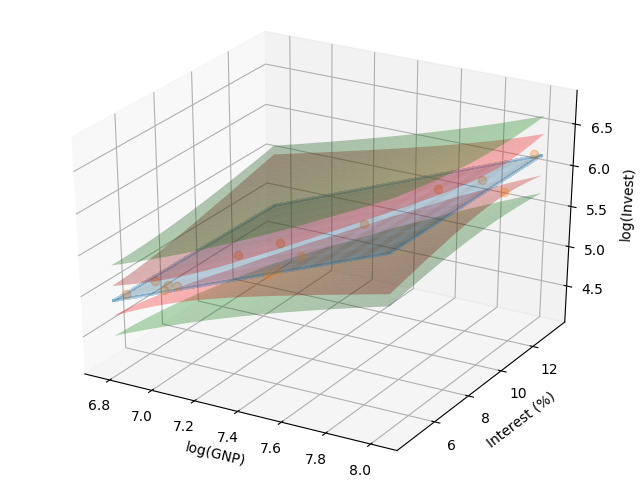

In [36]:
from mpl_toolkits.mplot3d import Axes3D
# interaction mode better for 3D
%matplotlib notebook
fig = plt.figure(6)
ax = Axes3D(fig)
XX = np.arange(np.min(gnp_log.values), np.max(gnp_log.values), 0.05)
YY = np.arange(np.min(interest_log.values), np.max(interest_log.values), 0.05)
xx, yy = np.meshgrid(XX, YY)
zz = theta3[0] + theta3[1] * xx + theta3[2] * yy
ax.set_xlabel('log(GNP)')
ax.set_ylabel('Interest (%)')
ax.set_zlabel('log(Invest)')
zz = theta3[0] + theta3[1] * xx + theta3[2] * yy
ax.plot_wireframe(xx, yy, zz, rstride=1000, cstride=1000, alpha=0.3,antialiased = False)
ax.plot_surface(xx, yy, zz, alpha=0.3)
ax.plot(gnp_log.values, interest_log.values, invest_log.values,'o', alpha=0.3)
plt.show()
#SURFACE IC
#METHODE 1 
xx = np.linspace(np.min(gnp_log.values),np.max(gnp_log.values), 100,endpoint=True)
yy = np.linspace(np.min(interest_log.values),np.max(interest_log.values),100,endpoint=True)
XX, YY = np.meshgrid(xx,yy)
IC1_=np.zeros((len(XX), len(YY)))
IC2_=np.zeros((len(XX), len(YY)))
IP1_=np.zeros((len(XX), len(YY)))
IP2_=np.zeros((len(XX), len(YY)))#X_explicative3=np.zeros(3)
for i in range(0, len(XX)) :
    for j in range(0,len(YY)):
        X_a_predire_=np.array([1,XX.item(i,j),YY.item(i,j)])
        A1_=(X_a_predire_.T).dot(G3_inv)
        A_=A1_.dot(X_a_predire_.reshape(3,1))
        IC1_[i,j]=np.dot(X_a_predire_,theta3)-Q*sigma_bruit_s_*(np.sqrt(A_))
        IC2_[i,j]=np.dot(X_a_predire_,theta3)+Q*sigma_bruit_s_*(np.sqrt(A_))
        IP1_[i,j]=np.dot(X_a_predire_,theta3)-Q*sigma_bruit_s_*(np.sqrt(A_+1))
        IP2_[i,j]=np.dot(X_a_predire_,theta3)+Q*sigma_bruit_s_*(np.sqrt(A_+1))

ax.plot_surface(XX,YY, IC2_, color='r',alpha=0.3,label="Confidence interval")
ax.plot_surface(XX,YY, IC1_, color='r',alpha=0.3)
ax.plot_surface(XX,YY, IP2_, color='g',alpha=0.3,label="Prediction interval")
ax.plot_surface(XX,YY, IP1_, color='g',alpha=0.3)

plt.show()

En rouge, sont tracés les plans des intervalles de confiance.
En vert, sont tracés  les plans des intervalles de prédiction.
En bleu, est tracé le plan de régression linéaire.
Les points correspondent aux données.

## Question 13

In [37]:
skl_lin= linear_model.LinearRegression()
dfg=np.log(df["gnp"])
dfi=df["interest"]
X_log=np.concatenate((dfg.values.reshape(n,1),dfi.values.reshape(n,1)),axis=1)
reg = skl_lin.fit(X_log, Y)
print("Les coefficients de (GNP) et (Interest) respectivement sont: ")
print(round(float(reg.coef_.squeeze()[0]),4))
print(round(float(reg.coef_.squeeze()[1]),4))
print("L'intercept est': ")
print(round(float(reg.intercept_.squeeze()),4))
print("Le coefficient de détermination est: ")
print(round(float(reg.score(X_log, Y)),4))
print("La prédiction est: ")
print(round(float(np.exp(reg.predict(np.array([[np.log(1000),10]]))).squeeze()),4))
print("EN LOG")
print(round(float(reg.predict(np.array([[np.log(1000),10]])).squeeze()),4))

Les coefficients de (GNP) et (Interest) respectivement sont: 
1.0512
-0.0065
L'intercept est': 
-2.1805
Le coefficient de détermination est: 
0.9633
La prédiction est: 
150.8044
EN LOG
5.016
